# Power Predict 

The first step is to upload the data and pre-process it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### We import the first file of the project 'Electricity_Data_Explorer.csv'

In [2]:
electricity_data_explorer = pd.read_csv('/Users/sylvainvanhuysse/code/VonRiecken/raw_data/Electricity_Data_Explorer.csv')

In [3]:
electricity_data_explorer

,Country,Time,Balance,Product,Value,Unit
0,Australia,July 2023,Net Electricity Production,Electricity,22460.2248,GWh
1,Australia,July 2023,Net Electricity Production,Total Combustible Fuels,15153.4307,GWh
2,Australia,July 2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",10684.9635,GWh
3,Australia,July 2023,Net Electricity Production,Oil and Petroleum Products,360.4031,GWh
4,Australia,July 2023,Net Electricity Production,Natural Gas,3848.6375,GWh
...,...,...,...,...,...,...
134466,IEA Total,January 2010,Total Imports,Electricity,34846.5580,GWh
134467,IEA Total,January 2010,Total Exports,Electricity,32372.5830,GWh
134468,IEA Total,January 2010,Used for pumped storage,Electricity,6869.2530,GWh
134469,IEA Total,January 2010,Distribution Losses,Electricity,62000.7330,GWh


In [4]:
products = electricity_data_explorer['Product'].unique()
##products

### We create a list to be used as a filter on specific countries:

In [5]:
filter_countries = ['Australia', 'Germany']

##['Germany', 'Argentina', 'Mexico', 'Canada', 'Spain', 'Norway', 'England', 'Tunisia', 'Morocco', 'Nigeria', 
            ## 'South Africa', 'Angola', 'Turkey', 'Iran', 'Australia', 'Thailand', 'Japan', 'South Korea', 'Liberia', 'France']

### We create a list to be used as a filter on the outputs:

In [6]:
filter_balance = ['Net Electricity Production']
                  ##, 'Final Consumption (Calculated)']

### We create a list to be used as a filter on the different sources of energy:

In [7]:
filter_products = ['Combustible Renewables', 'Hydro', 'Wind', 'Solar',
                   'Total Renewables (Hydro, Geo, Solar, Wind, Other)', 'Other Renewables']

### We apply the filters to the initial dataframe:

In [8]:
electricity_data_explorer = electricity_data_explorer[electricity_data_explorer['Product'].isin(filter_products)]
## electricity_data_explorer

In [9]:
electricity_data_explorer = electricity_data_explorer[electricity_data_explorer['Country'].isin(filter_countries)]

In [10]:
electricity_data_explorer = electricity_data_explorer[electricity_data_explorer['Balance'].isin(filter_balance)]
##electricity_data_explorer

### Reordering the columns

In [11]:
electricity_data_explorer = electricity_data_explorer[['Time', 'Country', 'Balance','Product','Value']]
electricity_data_explorer

,Time,Country,Balance,Product,Value
5,July 2023,Australia,Net Electricity Production,Combustible Renewables,259.4267
6,July 2023,Australia,Net Electricity Production,Hydro,1775.1418
7,July 2023,Australia,Net Electricity Production,Wind,3216.3408
8,July 2023,Australia,Net Electricity Production,Solar,2315.3114
9,July 2023,Australia,Net Electricity Production,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",7566.2207
...,...,...,...,...,...
133951,January 2010,Germany,Net Electricity Production,Combustible Renewables,2367.5750
133953,January 2010,Germany,Net Electricity Production,Hydro,2078.5300
133954,January 2010,Germany,Net Electricity Production,Wind,2906.4820
133955,January 2010,Germany,Net Electricity Production,Solar,423.8320


### Reindexing the dataframe

In [12]:
electricity_data_explorer.index = range(len(electricity_data_explorer.index))
electricity_data_explorer

,Time,Country,Balance,Product,Value
0,July 2023,Australia,Net Electricity Production,Combustible Renewables,259.4267
1,July 2023,Australia,Net Electricity Production,Hydro,1775.1418
2,July 2023,Australia,Net Electricity Production,Wind,3216.3408
3,July 2023,Australia,Net Electricity Production,Solar,2315.3114
4,July 2023,Australia,Net Electricity Production,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",7566.2207
...,...,...,...,...,...
1721,January 2010,Germany,Net Electricity Production,Combustible Renewables,2367.5750
1722,January 2010,Germany,Net Electricity Production,Hydro,2078.5300
1723,January 2010,Germany,Net Electricity Production,Wind,2906.4820
1724,January 2010,Germany,Net Electricity Production,Solar,423.8320


In [13]:
electricity_data_explorer = electricity_data_explorer.pivot_table('Value', ['Time','Country', 'Balance'], 'Product')

In [14]:
electricity_data_explorer = electricity_data_explorer.fillna(0)
electricity_data_explorer

Product                                              Combustible Renewables  \
Time           Country   Balance                                              
April 2010     Australia Net Electricity Production                216.2870   
               Germany   Net Electricity Production               2552.1510   
April 2011     Australia Net Electricity Production                165.1840   
               Germany   Net Electricity Production               2818.4370   
April 2012     Australia Net Electricity Production                237.5910   
...                                                                     ...   
September 2020 Germany   Net Electricity Production               3774.0712   
September 2021 Australia Net Electricity Production                258.0133   
               Germany   Net Electricity Production               3581.9108   
September 2022 Australia Net Electricity Production                245.7543   
               Germany   Net Electricity Production               3487.2255   

Product                                                  Hydro  \
Time           Country   Balance                                 
April 2010     Australia Net Electricity Production  1044.4060   
               Germany   Net Electricity Production  1946.7940   
April 2011     Australia Net Electricity Production   911.0370   
               Germany   Net Electricity Production  1667.2520   
April 2012     Australia Net Electricity Production  1207.4340   
...                                                        ...   
September 2020 Germany   Net Electricity Production  1930.8316   
September 2021 Australia Net Electricity Production  1355.8280   
               Germany   Net Electricity Production  2034.2972   
September 2022 Australia Net Electricity Production  1487.2850   
               Germany   Net Electricity Production  1681.1949   

Product                                              Other Renewables  \
Time           Country   Balance                                        
April 2010     Australia Net Electricity Production               0.0   
               Germany   Net Electricity Production               0.0   
April 2011     Australia Net Electricity Production               0.0   
               Germany   Net Electricity Production               0.0   
April 2012     Australia Net Electricity Production               0.0   
...                                                               ...   
September 2020 Germany   Net Electricity Production               0.0   
September 2021 Australia Net Electricity Production               0.0   
               Germany   Net Electricity Production               0.0   
September 2022 Australia Net Electricity Production               0.0   
               Germany   Net Electricity Production               0.0   

Product                                                  Solar  \
Time           Country   Balance                                 
April 2010     Australia Net Electricity Production    26.8110   
               Germany   Net Electricity Production  1366.0630   
April 2011     Australia Net Electricity Production    95.9400   
               Germany   Net Electricity Production  2333.9790   
April 2012     Australia Net Electricity Production   160.2440   
...                                                        ...   
September 2020 Germany   Net Electricity Production  4918.3229   
September 2021 Australia Net Electricity Production  3010.1989   
               Germany   Net Electricity Production  4984.5316   
September 2022 Australia Net Electricity Production  3284.6243   
               Germany   Net Electricity Production  5048.7507   

Product                                              Total Renewables (Hydro, Geo, Solar, Wind, Other)  \
Time           Country   Balance                                                                         
April 2010     Australia Net Electricity Production                                         

In [15]:
electricity_data_explorer = electricity_data_explorer.reset_index()
electricity_data_explorer

Product,Time,Country,Balance,Combustible Renewables,Hydro,Other Renewables,Solar,"Total Renewables (Hydro, Geo, Solar, Wind, Other)",Wind
0,April 2010,Australia,Net Electricity Production,216.2870,1044.4060,0.0,26.8110,1638.0980,350.5110
1,April 2010,Germany,Net Electricity Production,2552.1510,1946.7940,0.0,1366.0630,9011.8470,3145.0560
2,April 2011,Australia,Net Electricity Production,165.1840,911.0370,0.0,95.9400,1680.2160,507.9720
3,April 2011,Germany,Net Electricity Production,2818.4370,1667.2520,0.0,2333.9790,10720.2310,3900.5630
4,April 2012,Australia,Net Electricity Production,237.5910,1207.4340,0.0,160.2440,2037.8080,432.4560
...,...,...,...,...,...,...,...,...,...
321,September 2020,Germany,Net Electricity Production,3774.0712,1930.8316,0.0,4918.3229,16991.2404,6357.3687
322,September 2021,Australia,Net Electricity Production,258.0133,1355.8280,0.0,3010.1989,7080.1002,2456.0600
323,September 2021,Germany,Net Electricity Production,3581.9108,2034.2972,0.0,4984.5316,16364.1116,5751.6605
324,September 2022,Australia,Net Electricity Production,245.7543,1487.2850,0.0,3284.6243,7629.3701,2611.7065


In [27]:
electricity_data_explorer['Time'].min()

'April 2010'

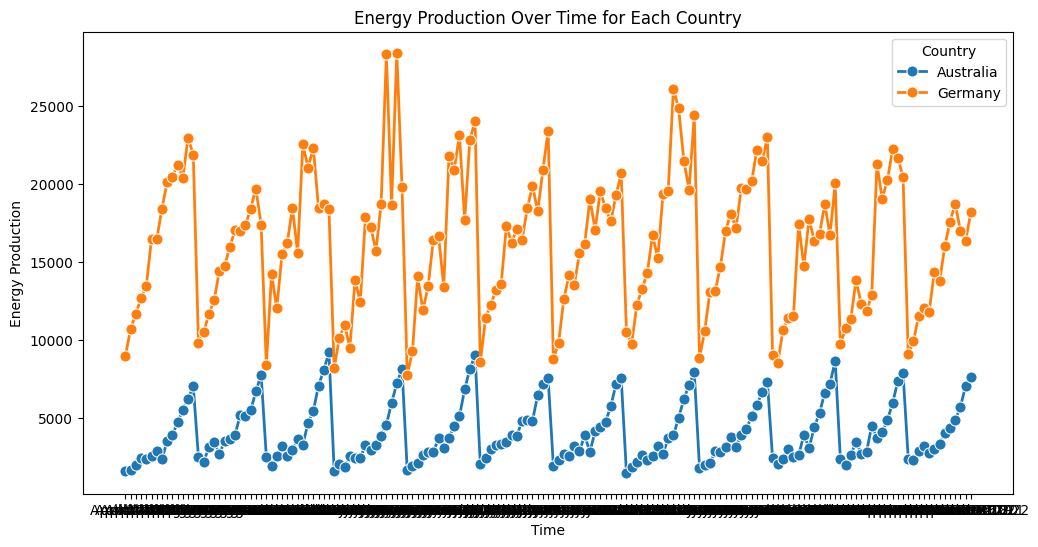

In [16]:
# Create the Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Total Renewables (Hydro, Geo, Solar, Wind, Other)', hue='Country', data=electricity_data_explorer, marker='o', markersize=8, linewidth=2)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Energy Production')
plt.title('Energy Production Over Time for Each Country')

# Show the legend
plt.legend(title='Country')

# Show the plot
plt.show()

In [17]:
specific_country = 'Canada'
filtered_df = electricity_data_explorer[electricity_data_explorer['Country'] == specific_country]


In [24]:
df = electricity_data_explorer

features = ['Combustible Renewables', 'Hydro', 'Wind', 'Solar',
            'Total Renewables (Hydro, Geo, Solar, Wind, Other)', 'Other Renewables']

##df['Time'] = df.index.month
combustible_renewables = df[['Time', 'Country','Combustible Renewables']]
hydro = df[['Time', 'Country','Hydro']]
wind= df[['Time', 'Country','Wind']]
solar = df[['Time', 'Country','Solar']]
total_renewables = df[['Time', 'Country','Total Renewables (Hydro, Geo, Solar, Wind, Other)']]
other_renewables = df[['Time', 'Country','Other Renewables']]

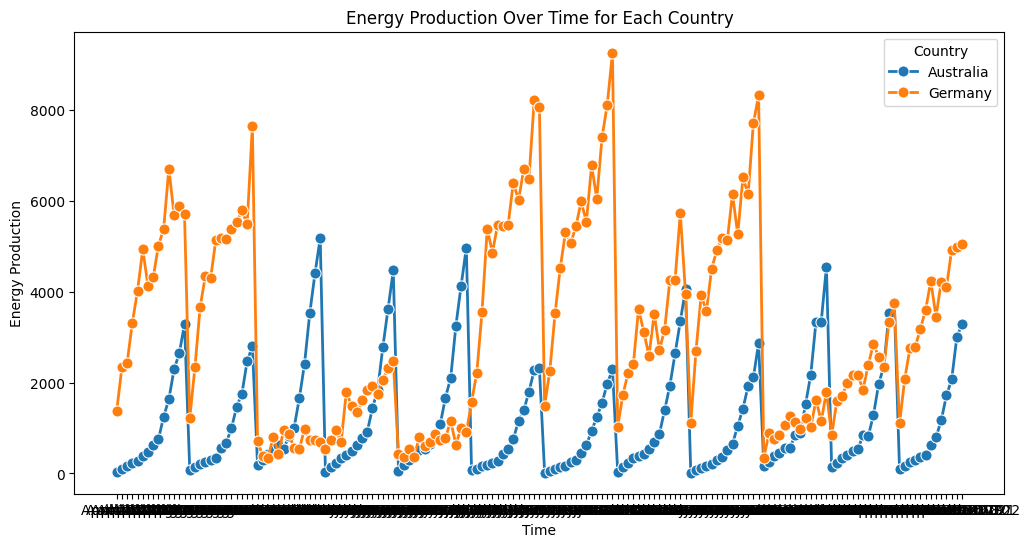

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Solar', hue='Country', data=solar, marker='o', markersize=8, linewidth=2)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Energy Production')
plt.title('Energy Production Over Time for Each Country')

# Show the legend
plt.legend(title='Country')

# Show the plot
plt.show()